In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

sad = pd.read_csv('C:/Users/hp/OneDrive - Universiteit Utrecht/Desktop/Internship/APEX_local/TxtInOut_APEX1501_modified/TxtInOut/SITE14.SAD',
                  delimiter=r'\s+', skiprows=9)
outflow=pd.read_csv('C:/Users/hp/OneDrive - Universiteit Utrecht/Desktop/Internship/APEX_local/02 - debieten/debiet adcp Vinkenloop.csv',
                    skiprows=1)
dmr = pd.read_csv('C:/Users/hp/OneDrive - Universiteit Utrecht/Desktop/Internship/APEX_local/TxtInOut_APEX1501_modified/TxtInOut/SITE14.DMR',
                  delimiter=r'\s+', skiprows=9)

#sad = pd.read_csv('C:/Users/shahi/Downloads/TxtInOut_APEX1501_modified/TxtInOut/SITE14.SAD',
#                  delimiter=r'\s+', skiprows=9)
#outflow=pd.read_csv('C:/Users/shahi/Downloads/Deltares_Cecile/levering voor deltares 20241011/02 - debieten/debiet adcp Vinkenloop.csv',
#                   skiprows=1)
#swt = pd.read_csv('C:/Users/shahi/Downloads/TxtInOut_APEX1501_modified/TxtInOut/SITE14.SWT',
#                 delimiter=r'\s+', skiprows=9)
#dmr = pd.read_csv('C:/Users/shahi/Downloads/TxtInOut_APEX1501_modified/TxtInOut/SITE14.DMR',
#                  delimiter=r'\s+', skiprows=9)
#dmr = pd.read_csv('C:/Users/shahi/Downloads/TxtInOut_APEX1501_modified_17_6_DLY issues/TxtInOut/SITE14.DMR', delimiter=r'\s+', skiprows=9)
outflow.head(1)

,Date,Time,Q.meting,Q.meting quality,Q.meting comments,Q.meting_2022_corrected
0,24/11/2021,00:00:00,0.0385,original unreliable MAN,NaN,0.0385


In [25]:
#swt['Date'] = pd.to_datetime(swt['YR'].astype(str), format='%Y')+pd.to_timedelta(swt['JDA'] - 1, unit='D')
dmr['Date'] = pd.to_datetime(dmr['YR'].astype(str), format='%Y')+pd.to_timedelta(dmr['JDA'] - 1, unit='D')

In [26]:
outflow['Date'] = pd.to_datetime(outflow.Date)
outflow['Q.meting']=outflow['Q.meting_2022_corrected']
outflow = outflow[outflow['Q.meting'] != -999]
daily_outflow = outflow['Q.meting'].groupby(outflow.Date).mean().reset_index()
daily_outflow['Q.meting_mm'] = daily_outflow['Q.meting']*1000*86400/(1.97*1000000) #conversion from m3/s to mm, divided by area of watershed
daily_outflow.to_csv(r'C:\Users\hp\OneDrive - Universiteit Utrecht\Desktop\Internship\APEX_local\02 - debieten\daily_avg_outflow.csv')
daily_outflow['Q.meting'] = daily_outflow['Q.meting']*1000*86400/(1.97*1000000)  #done twice, previous instance for getting both daily m3/s and mm in the output csv, this one for further processing in this code
print(daily_outflow)

           Date  Q.meting  Q.meting_mm
0    2021-11-24  1.266624     1.266624
1    2021-11-25  1.293259     1.293259
2    2021-11-26  1.219112     1.219112
3    2021-11-27  1.248487     1.248487
4    2021-11-28  1.272381     1.272381
...         ...       ...          ...
1046 2024-10-07  0.679386     0.679386
1047 2024-10-08  0.731010     0.731010
1048 2024-10-09  0.889766     0.889766
1049 2024-10-10  1.439726     1.439726
1050 2024-10-11  1.111912     1.111912

[1051 rows x 3 columns]


C:\Users\hp\AppData\Local\Temp\ipykernel_21272\986242396.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  outflow['Date'] = pd.to_datetime(outflow.Date)


C:\Users\hp\AppData\Local\Temp\ipykernel_21272\1979568275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad.rename(columns={'Y':'Year', 'M':'Month', 'D':'Day'}, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_21272\1979568275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sad['Date'] = pd.to_datetime(sub_sad[['Year', 'Month', 'Day']])


Mean: 0.236814703196347


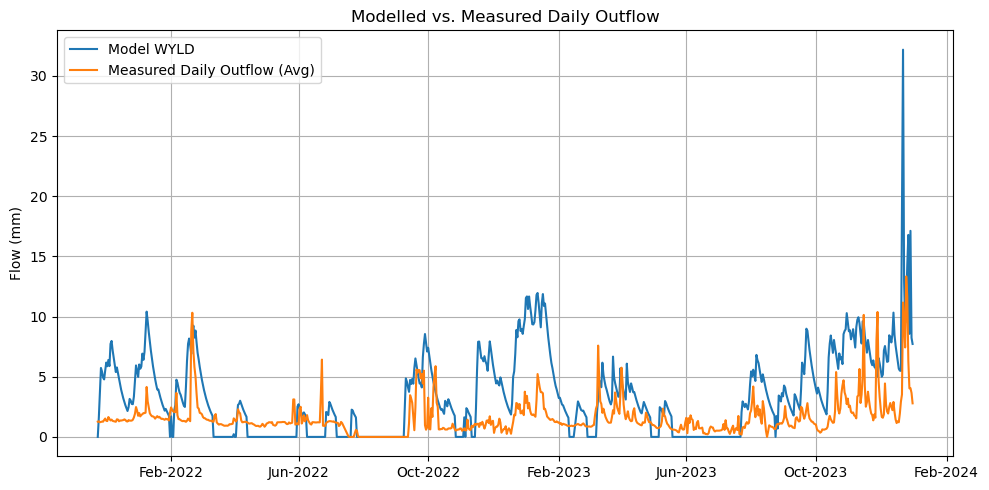

        Date  Q.meting  Q.meting_mm    WYLD  JDA    YR        WYLDmm  Yppm  \
0 2021-11-24  1.266624     1.266624  0.0000  328  2021  6.251330e-09   0.0   
1 2021-11-25  1.293259     1.293259  1.6120  329  2021  3.218900e+00   0.0   
2 2021-11-26  1.219112     1.219112  3.7804  330  2021  7.450580e+00   0.0   
3 2021-11-27  1.248487     1.248487  5.7302  331  2021  1.191610e+01   0.0   
4 2021-11-28  1.272381     1.272381  5.4314  332  2021  1.095850e+01   0.0   

   YNppm  YPppm    QNppm  QPppm  
0    0.0    0.0  15.3665    0.0  
1    0.0    0.0  56.4365    0.0  
2    0.0    0.0  24.2581    0.0  
3    0.0    0.0  38.6905    0.0  
4    0.0    0.0  65.0397    0.0  


In [27]:
sub_sad = sad[sad['#']==3]
sub_sad.rename(columns={'Y':'Year', 'M':'Month', 'D':'Day'}, inplace=True)
sub_sad['Date'] = pd.to_datetime(sub_sad[['Year', 'Month', 'Day']])
mean=sub_sad['WYLD'].mean()
print("Mean:", mean)

sad.rename(columns={'Y':'Year', 'M':'Month', 'D':'Day'}, inplace=True)
sad['Date'] = pd.to_datetime(sad[['Year','Month', 'Day']])
sum_sad = sad['WYLD'].groupby(sad.Date).sum()

merged= pd.merge(daily_outflow, sum_sad, on ='Date', how = 'inner')
#merged = pd.merge(merged, swt, on='Date', how='inner')
merged = pd.merge(merged, dmr, on='Date', how='inner')

cutoff_date = pd.to_datetime('2024-10-15')
merged_filtered = merged[merged['Date'] <= cutoff_date].copy()

fig,ax=plt.subplots(1,1, figsize=(10,5))
plt.plot(merged_filtered['Date'],merged_filtered['WYLD'], label='Model WYLD')
plt.plot(merged_filtered['Date'], merged_filtered['Q.meting'], label = 'Measured Daily Outflow (Avg)')
#plt.plot(merged_filtered['Date'], merged_filtered['WYLDmm'], label='Watershed outlet file')
#plt.plot(merged_filtered['Date'], merged_filtered['WYLDmm'], label='DMR file outflow')
#plt.xlabel('Date')
plt.ylabel('Flow (mm)')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.title('Modelled vs. Measured Daily Outflow')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(merged.head(5))
#make new dataframe with all dates, one column of validation data, another column of wateryield data

MAE:  2.418810459795497
Percent error:  152.46211265846955
MAE_DMR:  5.566262385335004
DMR percent error:  350.8518492810293


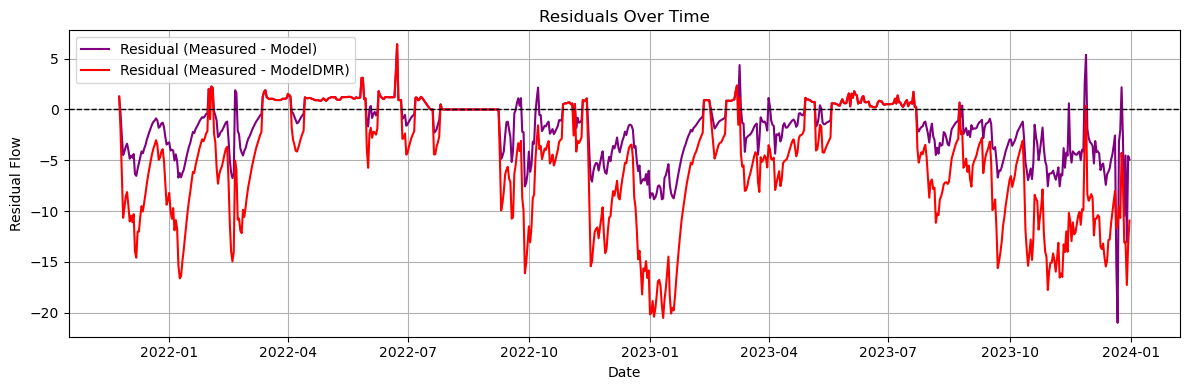

In [28]:

merged_filtered['Residual'] = merged_filtered['Q.meting'] - merged_filtered['WYLD']
merged_filtered['Abs_Residual'] =  merged_filtered['Residual'].abs()
print("MAE: ", merged_filtered['Abs_Residual'].mean())
print("Percent error: ", merged_filtered['Abs_Residual'].mean()/merged_filtered['Q.meting'].mean()*100)

merged_filtered['Residual_DMR'] = merged_filtered['Q.meting'] - merged_filtered['WYLDmm']
merged_filtered['Abs_Residual_DMR'] =  merged_filtered['Residual_DMR'].abs()
print("MAE_DMR: ", merged_filtered['Abs_Residual_DMR'].mean())
print("DMR percent error: ", merged_filtered['Abs_Residual_DMR'].mean()/merged_filtered['Q.meting'].mean()*100)

plt.figure(figsize=(12, 4))
plt.plot(merged_filtered['Date'], merged_filtered['Residual'], label='Residual (Measured - Model)', color='purple')
plt.plot(merged_filtered['Date'], merged_filtered['Residual_DMR'], label='Residual (Measured - ModelDMR)', color='red')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Residual Flow')
plt.title('Residuals Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
#Nitrogen outflow validation

N_outflow = pd.read_excel("C:/Users/hp/OneDrive - Universiteit Utrecht/Desktop/Internship/APEX_local/N_P_validation_data_v2.xlsx")
N_outflow.head()

,Date,Ntot_mg/l,Date_P,Ptot_mg/l
0,2020-01-14,13.5,2020-01-15,0.36
1,2020-01-21,6.0,2020-01-21,0.16
2,2020-01-28,5.4,2020-01-28,0.10
3,2020-02-03,6.4,2020-02-04,0.12
4,2020-02-11,8.2,2020-02-11,0.14


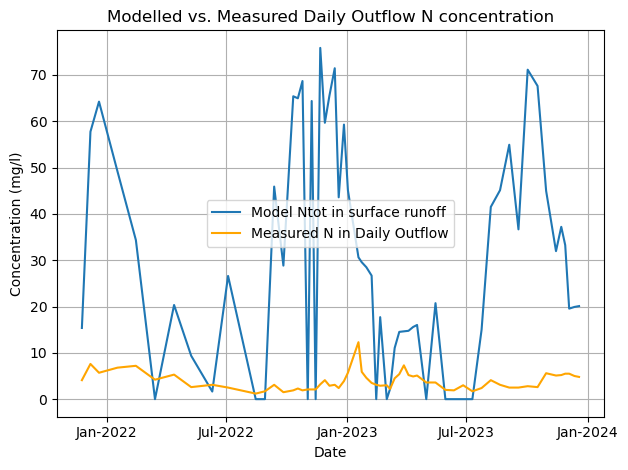

In [30]:
fig,ax=plt.subplots()

merged= pd.merge(merged, N_outflow, on ='Date', how = 'inner')
cutoff_date = pd.to_datetime('2024-10-15')
merged_filtered = merged[merged['Date'] <= cutoff_date].copy()

plt.plot(merged_filtered['Date'],merged_filtered['QNppm'], label='Model Ntot in surface runoff')
plt.plot(merged_filtered['Date'], merged_filtered['Ntot_mg/l'], label = 'Measured N in Daily Outflow', color="orange")

plt.xlabel('Date')
plt.ylabel('Concentration (mg/l)')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.title('Modelled vs. Measured Daily Outflow N concentration')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

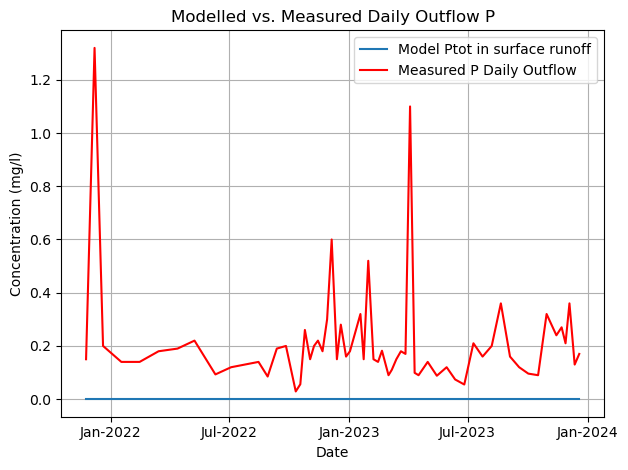

In [31]:
fig1,ax1=plt.subplots()

plt.plot(merged_filtered['Date'],merged_filtered['QPppm'], label='Model Ptot in surface runoff')
plt.plot(merged_filtered['Date'], merged_filtered['Ptot_mg/l'], label = 'Measured P Daily Outflow', color="red")

plt.xlabel('Date')
plt.ylabel('Concentration (mg/l)')
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.title('Modelled vs. Measured Daily Outflow P')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
merged.head(20)

,Date,Q.meting,Q.meting_mm,WYLD,JDA,YR,WYLDmm,Yppm,YNppm,YPppm,QNppm,QPppm,Ntot_mg/l,Date_P,Ptot_mg/l
0,2021-11-24,1.266624,1.266624,0.0000,328,2021,6.251330e-09,0.0,0.0,0.0,15.36650,0.0,4.1,2021-11-23,0.150
1,2021-12-07,1.439635,1.439635,7.9760,341,2021,1.603340e+01,0.0,0.0,0.0,57.73950,0.0,7.6,2021-12-02,1.320
2,2021-12-20,1.412817,1.412817,2.6306,354,2021,5.260480e+00,0.0,0.0,0.0,64.22830,0.0,5.7,2021-12-07,0.200
3,2022-01-17,1.519264,1.519264,4.8020,17,2022,9.600380e+00,0.0,0.0,0.0,49.19620,0.0,6.8,2021-12-21,0.140
4,2022-02-14,1.300980,1.300980,2.4916,45,2022,4.973950e+00,0.0,0.0,0.0,34.34290,0.0,7.2,2022-01-19,0.140
5,2022-03-15,1.900371,1.900371,0.0000,74,2022,1.000000e-10,0.0,0.0,0.0,0.00000,0.0,4.2,2022-02-15,0.180
6,2022-04-13,1.243964,1.243964,1.6716,103,2022,3.340780e+00,0.0,0.0,0.0,20.32950,0.0,5.3,2022-03-15,0.190
7,2022-05-09,0.968162,0.968162,0.0000,129,2022,3.988860e-07,0.0,0.0,0.0,9.36356,0.0,2.6,2022-04-13,0.220
8,2022-06-10,1.382025,1.382025,0.0000,161,2022,3.864070e-10,0.0,0.0,0.0,1.64549,0.0,3.1,2022-05-10,0.093
9,2022-07-04,1.291112,1.291112,2.0216,185,2022,4.043070e+00,0.0,0.0,0.0,26.60440,0.0,2.5,2022-06-08,0.120


In [33]:
#NSE

# # Drop rows with missing values (if any)
# merged_filtered = merged.dropna(subset=['WYLD', 'Q.meting'])

# # Extract observed and modeled values
# obs = merged_filtered['Q.meting']
# sim = merged_filtered['WYLD']

# # Calculate Nash-Sutcliffe Efficiency
# numerator = ((obs - sim) ** 2).sum()
# denominator = ((obs - obs.mean()) ** 2).sum()

# NSE = 1 - (numerator / denominator)

# print(f"Nash-Sutcliffe Efficiency (NSE): {NSE:.4f}")

##
# Filter the dataframe for the given date interval
#merged_filtered = merged[(merged['Date'] >= '2021-12-01') & (merged['Date'] <= '2022-01-31')]

# Drop rows with missing values (if any)
merged_filtered = merged_filtered.dropna(subset=['WYLD', 'Q.meting'])

# Extract observed and modeled values
obs = merged_filtered['Q.meting']
sim = merged_filtered['WYLD']

# Calculate Nash-Sutcliffe Efficiency
numerator = ((obs - sim) ** 2).sum()
denominator = ((obs - obs.mean()) ** 2).sum()

NSE = 1 - (numerator / denominator)

#print(f"Nash-Sutcliffe Efficiency (NSE) from {start_date} to {end_date}: {NSE:.4f}")
print(f"Nash-Sutcliffe Efficiency (NSE): {NSE:.4f}")

Nash-Sutcliffe Efficiency (NSE): -4.8827
